## MNIST dataset
is a set of 70000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents.

## Get the data


In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


There are 70000 images, each image has 784 features. This is because each image is 28x28 pixels, and each feature represents one pixel's intensity, from 0 (white) to 255(black). Let's take a look at one digit from dataset

Note: X is dataframe, y is array (string)

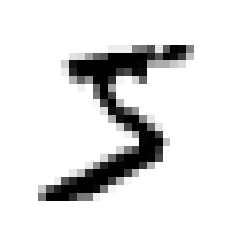

In [4]:
import matplotlib.pyplot as plt
import numpy as np

some_digit = np.array(X.head(1)) # feature vector of instance which index=0
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [5]:
#label
y[0]

'5'

Note that the label is a string. Most ML algorithms expect numbers, so let's cast y to integer

In [6]:
y = y.astype(int)

In [7]:
y.dtype

dtype('int32')

## Create Test set

The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training Binary Classifier

Let's simplify the problem for now and only try to identify one digit - for example, the number 5. This "5-detector" will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let's create the target vectors for this classification task:

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

Use SGD classifier to train it. This classifier has the advantagr of being capable of handling very large datasets efficiently. Because SGD deals with training instances independently, one at a time

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [11]:
sgd_clf.predict(some_digit)

array([ True])

## Performance Measures

Let use the cross_val_score() function to evaluate SGDClassifier model, using K-fold cross-validation with 3 folds. 

In [12]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

Above 95% accuracy. Next, let's look at a very dumb classifier that just classifies every single image in the "not-5" class:

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [14]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

It has over 90% accuracy. This is simply because only about 10% of the images are 5s, so we will be right about 90% of the time if we always guess that an image is not a 5

This is why accuracy is generally not the preferred performance measure for classifier

## Confusion Matrix



In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [18]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

## Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [21]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
To combine precision and recall into a single metric called the F1 score, to compare two classifiers.

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846